In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = "../data/raw/emnist-balanced-train.csv"
test_path = "../data/raw/emnist-balanced-test.csv"

In [3]:
train_df = pd.read_csv(train_path, header = None)
test_df = pd.read_csv(test_path, header = None)

In [4]:
train_df.shape

(112800, 785)

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separate labels and images

In [6]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

In [7]:
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

### Reshape rows into images

In [8]:
X_train_images = X_train.reshape(-1, 28, 28)
X_test_images = X_test.reshape(-1, 28, 28)

### Visualize handwritten characters (MOST IMPORTANT PART)

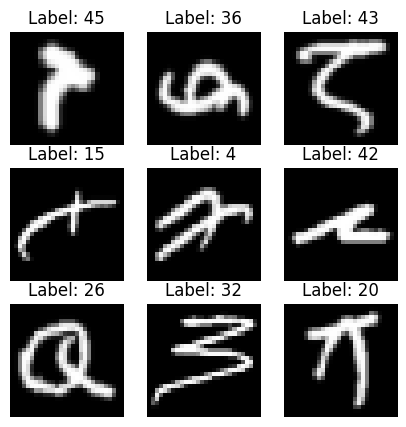

In [9]:
plt.figure(figsize=(5, 5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_images[i], cmap = "gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

### Data Preprocessing (Making Data CNN-Ready)

In [10]:
X_train_images = X_train_images / 255.0
X_test_images  = X_test_images / 255.0

In [11]:
X_train_images = np.rot90(X_train_images, k=1, axes=(1, 2))
X_train_images = np.fliplr(X_train_images)

X_test_images = np.rot90(X_test_images, k=1, axes=(1, 2))
X_test_images = np.fliplr(X_test_images)

In [12]:
X_train_images = X_train_images[..., np.newaxis]
X_test_images  = X_test_images[..., np.newaxis]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_images, y_train,
    test_size=0.1,
    random_state=42
)


In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test_images.shape)


(101520, 28, 28, 1)
(11280, 28, 28, 1)
(18800, 28, 28, 1)


### Building the First CNN

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


2026-02-01 13:12:30.329175: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-01 13:12:30.329558: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-01 13:12:30.378663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-01 13:12:31.956666: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [16]:
model = Sequential()

# 1st Convolution layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28, 28, 1)
))

# Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu'
))

# Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer (47 classes)
model.add(Dense(47, activation='softmax'))

/home/prashant/Code/Data Science/Handwritten Character Recognition/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-01 13:12:32.423192: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,807 (897.68 KB)

 Trainable params: 229,807 (897.68 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7448 - loss: 0.8472 - val_accuracy: 0.8220 - val_loss: 0.5373
Epoch 2/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8468 - loss: 0.4534 - val_accuracy: 0.8455 - val_loss: 0.4508
Epoch 3/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8654 - loss: 0.3890 - val_accuracy: 0.8598 - val_loss: 0.4040
Epoch 4/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8772 - loss: 0.3465 - val_accuracy: 0.8676 - val_loss: 0.3877
Epoch 5/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8859 - loss: 0.3166 - val_accuracy: 0.8700 - val_loss: 0.3773
Epoch 6/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8931 - loss: 0.2926 - val_accuracy: 0.8716 - val_loss: 0.3695
Epoch 7/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8982 - loss: 0.2715 - val_accuracy: 0.8677 - val_loss: 0.3784
Epoch 8/10
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9037 - loss: 0.2517 - 

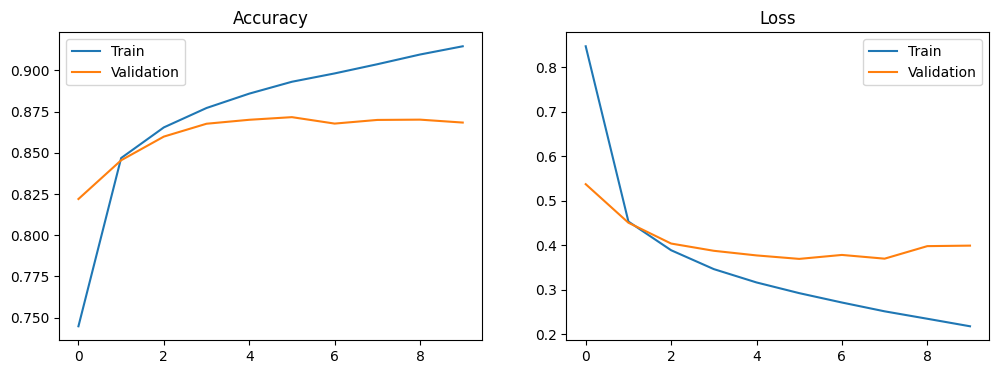

In [20]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(X_test_images, y_test)
print("Test accuracy:", test_accuracy)

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8685 - loss: 0.4064
Test accuracy: 0.8684574365615845


In [22]:
model.save("../models/emnist_cnn.h5")

In [23]:
import numpy as np

index = 4  # try changing this
image = X_test_images[index]
label = y_test[index]

prediction = model.predict(image[np.newaxis, ...])
predicted_class = np.argmax(prediction)

print("True label:", label)
print("Predicted label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
True label: 44
Predicted label: 44


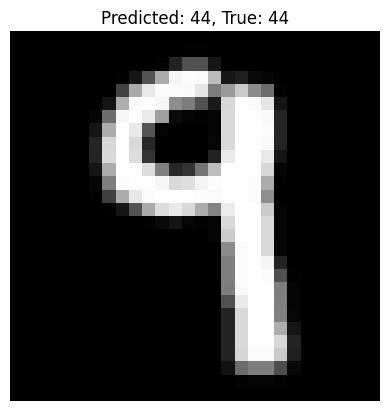

In [24]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class}, True: {label}")
plt.axis("off")
plt.show()

### Improving the Model

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))   # ⭐ important

model.add(Dense(47, activation='softmax'))


In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    X_train, y_train,
    epochs=12,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.6177 - loss: 1.2963 - val_accuracy: 0.8246 - val_loss: 0.5148
Epoch 2/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7751 - loss: 0.6997 - val_accuracy: 0.8436 - val_loss: 0.4465
Epoch 3/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8028 - loss: 0.6015 - val_accuracy: 0.8556 - val_loss: 0.4074
Epoch 4/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8188 - loss: 0.5444 - val_accuracy: 0.8642 - val_loss: 0.3831
Epoch 5/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8286 - loss: 0.5108 - val_accuracy: 0.8677 - val_loss: 0.3682
Epoch 6/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8378 - loss: 0.4791 - val_accuracy: 0.8697 - val_loss: 0.3610
Epoch 7/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8442 - loss: 0.4534 - val_accuracy: 0.8719 - val_loss: 0.3526
Epoch 8/12
794/794 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8507 - loss: 0.4339 - 

In [30]:
test_loss, test_accuracy = model.evaluate(X_test_images, y_test)
print("New test accuracy:", test_accuracy)

588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8782 - loss: 0.3644
New test accuracy: 0.8781914710998535


### Confusion Matrix (SEE model mistakes)

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test_images), axis=1)
cm = confusion_matrix(y_test, y_pred)

588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


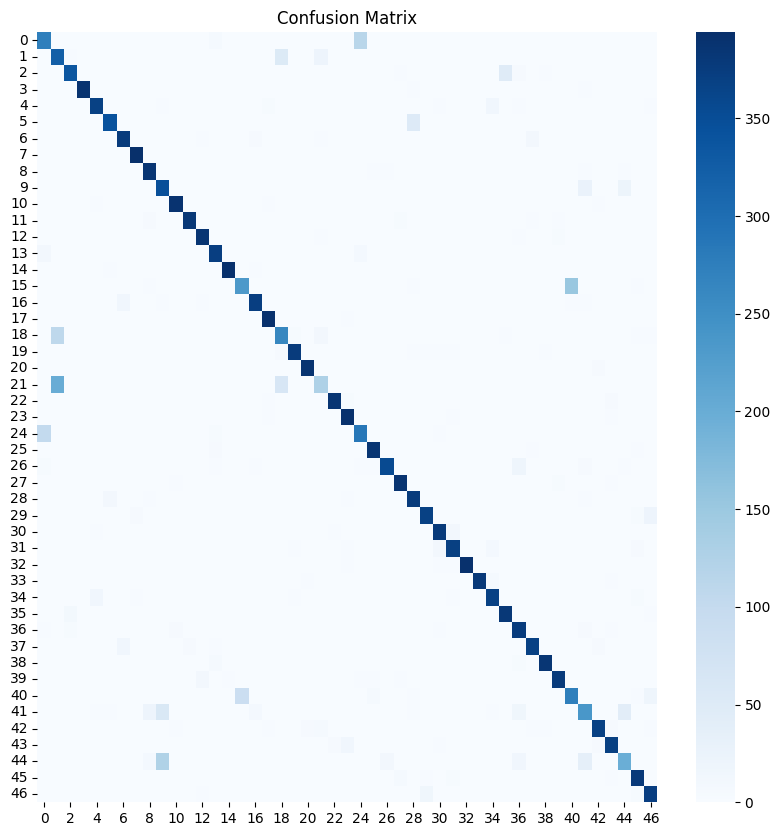

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()